# Global Explainer - ETN

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from local_explanations import *
import utils
import models
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import torch
import torch_geometric.transforms as T
from torch_geometric.utils import from_networkx, to_networkx

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read hyper-parameters and data

In [8]:
DATASET_NAME = "HIN"

with open("../config/" + DATASET_NAME + "_params.json") as json_file:
    hyper_params = json.load(json_file)

In [9]:
adjs_train , \
edge_weights_train , \
ori_adjs_train , \
ori_classes_train , \
belonging_train , \
summary_predictions_train , \
le_classes_train ,\
embeddings_train = read_hin(split="TRAIN", priori_annotation=True)

In [10]:
adjs_val , \
edge_weights_val , \
ori_adjs_val , \
ori_classes_val , \
belonging_val , \
summary_predictions_val , \
le_classes_val ,\
embeddings_val = read_hin(split="VAL", priori_annotation=True)

In [11]:
adjs_test , \
edge_weights_test , \
ori_adjs_test , \
ori_classes_test , \
belonging_test , \
summary_predictions_test , \
le_classes_test ,\
embeddings_test = read_hin(split="TEST", priori_annotation=True)

### Dataset

In [15]:
device = "cuda" #torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = None  

dataset_train = utils.LocalExplanationsDataset("", adjs_train, "embeddings", transform=transform, y=le_classes_train, belonging=belonging_train, task_y=ori_classes_train, precomputed_embeddings=embeddings_train)
dataset_val   = utils.LocalExplanationsDataset("", adjs_val, "embeddings", transform=transform, y=le_classes_val, belonging=belonging_val, task_y=ori_classes_val, precomputed_embeddings=embeddings_val)
dataset_test  = utils.LocalExplanationsDataset("", adjs_test, "embeddings", transform=transform, y=le_classes_test, belonging=belonging_test, task_y=ori_classes_test, precomputed_embeddings=embeddings_test)

C:\Users\Steve\Desktop\GNN\gnn_logic_global_expl\code\utils.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = Data(x=features,
C:\Users\Steve\Desktop\GNN\gnn_logic_global_expl\code\utils.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  task_y=torch.tensor(int(task_y[belonging[i]]), dtype=torch.long) if y is not None else None, # the class of the original input graph


## Train GLGExplainer

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([273, 139,  32,  51,  65,  58,  42,  90], dtype=int64))
[0.8619031  0.09132312]


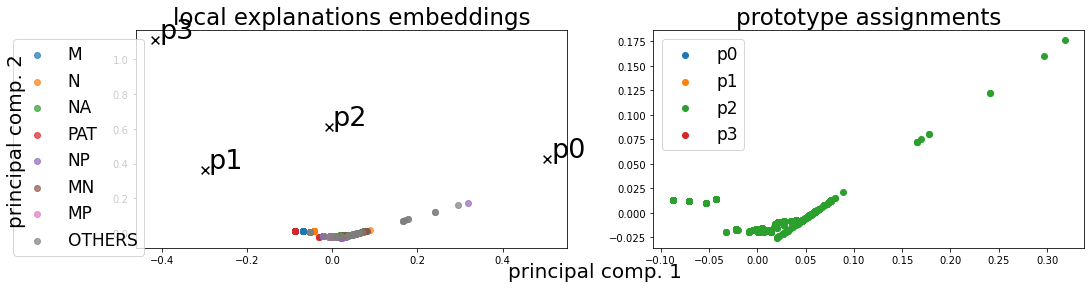

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]], device='cuda:0')
Concept Purity: 0.364000 +- 0.000000
Concept distribution:  (array([2], dtype=int64), array([750], dtype=int64))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0., device='cuda:0')

  1: Loss: 0.27936, LEN: 0.096436, AccxC: 0.57, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.24028, V. LEN 0.10
  2: Loss: 0.22880, LEN: 0.095958, AccxC: 0.57, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.20413, V. LEN 0.10
  3: Loss: 0.19641, LEN: 0.095704, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.18034, V. LEN 0.10
  4: Loss: 0.17632, LEN: 0.096038, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.17273, V. LEN 0.10
  5: Loss: 0.16546, LEN: 0.095490, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.16448, V. LEN 0.10
  6: Loss: 0.16153, LEN: 0.094870, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.15797, V. LEN 0.09
  7: Loss: 0.14867,

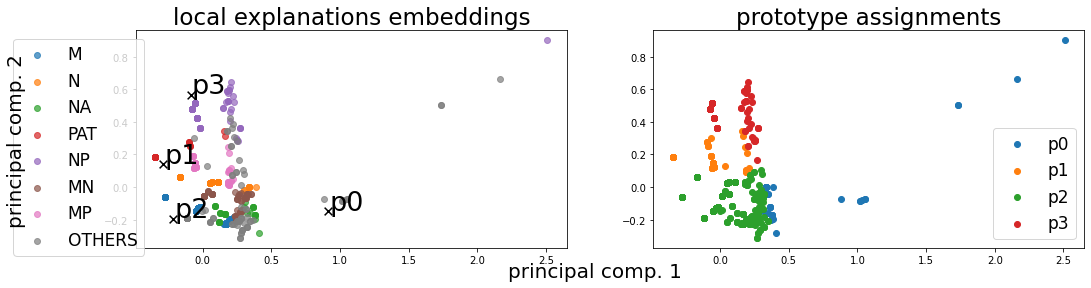

Alpha norms:
tensor([[0.8460, 0.5896, 1.0000, 0.7405],
        [1.0000, 0.7527, 0.9572, 0.7863]], device='cuda:0')
Concept Purity: 0.580159 +- 0.188604
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([ 34,  83, 559,  74], dtype=int64))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0., device='cuda:0')


 20: Loss: 0.09537, LEN: 0.089084, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09460, V. LEN 0.09
 21: Loss: 0.09461, LEN: 0.088746, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09343, V. LEN 0.09
 22: Loss: 0.09362, LEN: 0.088432, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09233, V. LEN 0.09
 23: Loss: 0.09339, LEN: 0.088134, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09159, V. LEN 0.09
 24: Loss: 0.09132, LEN: 0.087764, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09069, V. LEN 0.09
 25: Loss: 0.09231, LEN: 0.087504, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09029, V. LEN

KeyboardInterrupt: 

In [16]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)

torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"],
                                 backbone=hyper_params["embedder_backbone"],
                                 num_layers=hyper_params["embedder_num_layers"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model,
                                   device, 
                                   hyper_params=hyper_params,
                                   classes_names=priori_etn_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)

expl.iterate(train_group_loader, val_group_loader, plot=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([273, 139,  32,  51,  65,  58,  42,  90], dtype=int64))
[0.8619031  0.09132303]


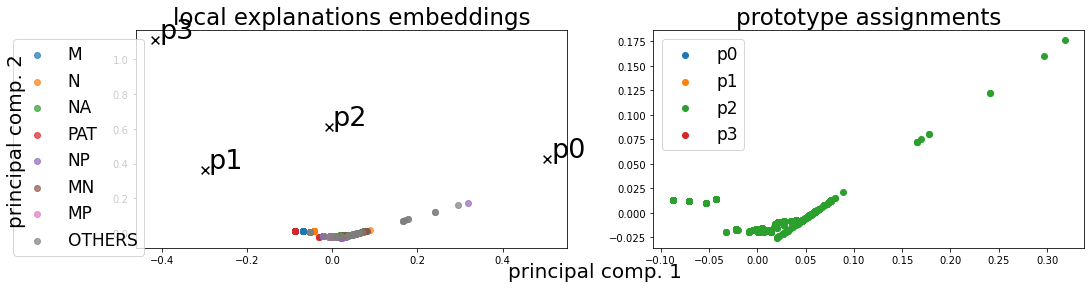

Alpha norms:
tensor([[1.0000, 0.8459, 0.8427, 0.9224],
        [0.8005, 0.7799, 1.0000, 0.8565]])
Concept Purity: 0.364000 +- 0.000000
Concept distribution:  (array([2], dtype=int64), array([750], dtype=int64))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)

  1: Loss: 0.27936, LEN: 0.096436, AccxC: 0.57, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.24028, V. LEN 0.10
  2: Loss: 0.22880, LEN: 0.095958, AccxC: 0.57, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.20413, V. LEN 0.10
  3: Loss: 0.19641, LEN: 0.095704, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.18034, V. LEN 0.10
  4: Loss: 0.17632, LEN: 0.096038, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.17273, V. LEN 0.10
  5: Loss: 0.16546, LEN: 0.095490, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.16448, V. LEN 0.10
  6: Loss: 0.16153, LEN: 0.094870, AccxC: 0.58, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.15797, V. LEN 0.09
  7: Loss: 0.14867, LEN: 0.094444, AccxC: 0.59, AccO:

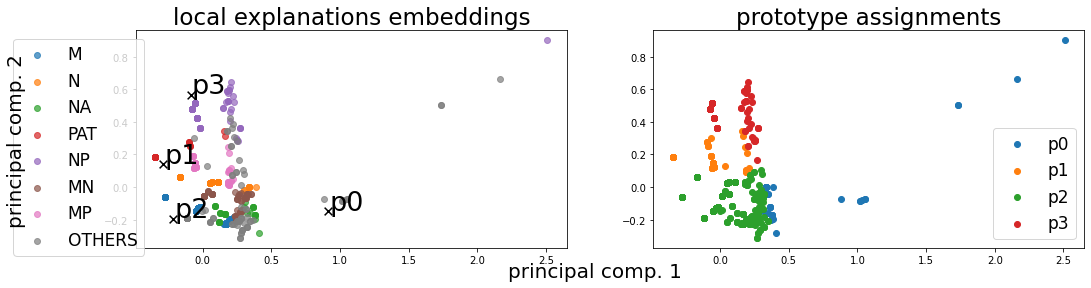

Alpha norms:
tensor([[0.8460, 0.5896, 1.0000, 0.7405],
        [1.0000, 0.7527, 0.9572, 0.7863]])
Concept Purity: 0.580159 +- 0.188604
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([ 34,  83, 559,  74], dtype=int64))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 20: Loss: 0.09537, LEN: 0.089084, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09460, V. LEN 0.09
 21: Loss: 0.09461, LEN: 0.088746, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09343, V. LEN 0.09
 22: Loss: 0.09362, LEN: 0.088432, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09233, V. LEN 0.09
 23: Loss: 0.09339, LEN: 0.088134, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09159, V. LEN 0.09
 24: Loss: 0.09132, LEN: 0.087764, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09069, V. LEN 0.09
 25: Loss: 0.09231, LEN: 0.087504, AccxC: 0.61, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.09029, V. LEN 0.09
 26: Loss: 0.08972, LEN: 0.0

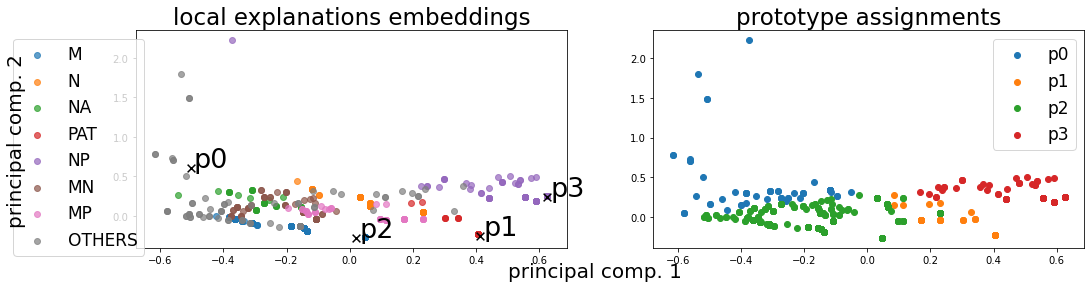

Alpha norms:
tensor([[0.7456, 0.3976, 1.0000, 0.5432],
        [1.0000, 0.5001, 0.8270, 0.6249]])
Concept Purity: 0.634094 +- 0.210253
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([ 58,  68, 554,  70], dtype=int64))
Logic formulas:
For class 0:
0.6986666666666667 (feature003) | ((feature001) | (feature000)
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.5053)


 40: Loss: 0.08578, LEN: 0.083538, AccxC: 0.70, AccO: 0.51, V. Acc: 0.44, V. Loss: 0.08499, V. LEN 0.08
 41: Loss: 0.08378, LEN: 0.081863, AccxC: 0.76, AccO: 0.48, V. Acc: 0.44, V. Loss: 0.08447, V. LEN 0.08
 42: Loss: 0.08494, LEN: 0.083025, AccxC: 0.70, AccO: 0.51, V. Acc: 0.44, V. Loss: 0.08403, V. LEN 0.08
 43: Loss: 0.08433, LEN: 0.082667, AccxC: 0.70, AccO: 0.51, V. Acc: 0.44, V. Loss: 0.08399, V. LEN 0.08
 44: Loss: 0.08170, LEN: 0.080552, AccxC: 0.77, AccO: 0.49, V. Acc: 0.44, V. Loss: 0.08192, V. LEN 0.08
 45: Loss: 0.08185, LEN: 0.080594, AccxC: 0.76, AccO: 0.60, V. Acc: 0.60

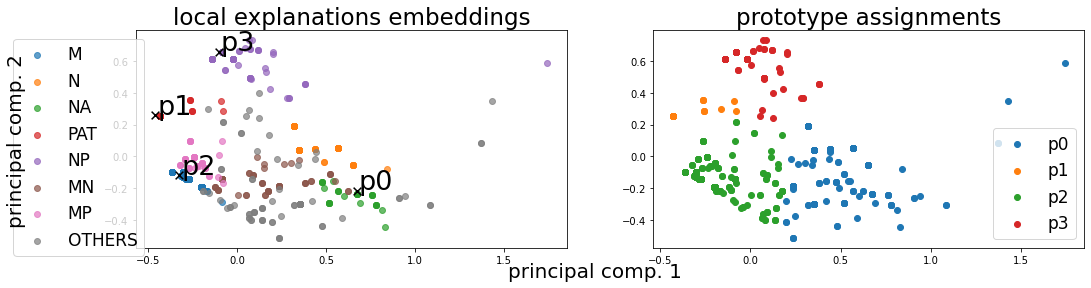

Alpha norms:
tensor([[0.6471, 0.3379, 1.0000, 0.5909],
        [1.0000, 0.3814, 0.5084, 0.5231]])
Concept Purity: 0.799596 +- 0.169558
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([245,  52, 385,  68], dtype=int64))
Logic formulas:
For class 0:
0.8626666666666667 (feature000) | ((feature001) | (feature003)
For class 1:
0.8626666666666667 (feature002)
Accuracy as classifier:  0.8627
LEN fidelity:  tensor(0.8627)


 60: Loss: 0.06698, LEN: 0.066430, AccxC: 0.87, AccO: 0.87, V. Acc: 0.85, V. Loss: 0.06842, V. LEN 0.07
 61: Loss: 0.06653, LEN: 0.066143, AccxC: 0.87, AccO: 0.87, V. Acc: 0.85, V. Loss: 0.06781, V. LEN 0.07
 62: Loss: 0.06576, LEN: 0.065391, AccxC: 0.87, AccO: 0.87, V. Acc: 0.86, V. Loss: 0.06576, V. LEN 0.07
 63: Loss: 0.06498, LEN: 0.064646, AccxC: 0.86, AccO: 0.86, V. Acc: 0.86, V. Loss: 0.06497, V. LEN 0.06
 64: Loss: 0.06375, LEN: 0.063447, AccxC: 0.87, AccO: 0.87, V. Acc: 0.86, V. Loss: 0.06418, V. LEN 0.06
 65: Loss: 0.06322, LEN: 0.062830, AccxC: 0.

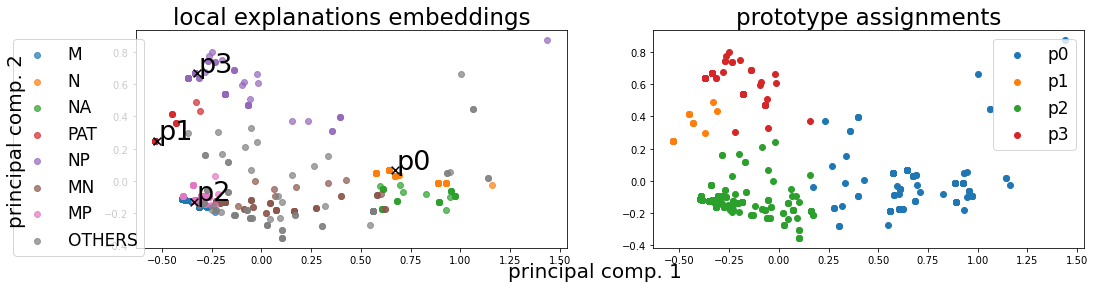

Alpha norms:
tensor([[0.8132, 0.4728, 1.0000, 0.5325],
        [1.0000, 0.2977, 0.3878, 0.3216]])
Concept Purity: 0.804747 +- 0.171018
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([232,  52, 406,  60], dtype=int64))
Logic formulas:
For class 0:
0.8826666666666667 (feature000) | ((feature001) | (feature003)
For class 1:
0.8826666666666667 (feature002)
Accuracy as classifier:  0.8827
LEN fidelity:  tensor(0.8827)


 80: Loss: 0.05248, LEN: 0.052403, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05548, V. LEN 0.06
 81: Loss: 0.05159, LEN: 0.051507, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05485, V. LEN 0.05
 82: Loss: 0.05073, LEN: 0.050654, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05402, V. LEN 0.05
 83: Loss: 0.05029, LEN: 0.050218, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05339, V. LEN 0.05
 84: Loss: 0.04963, LEN: 0.049570, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05294, V. LEN 0.05
 85: Loss: 0.04950, LEN: 0.049428, AccxC: 0.

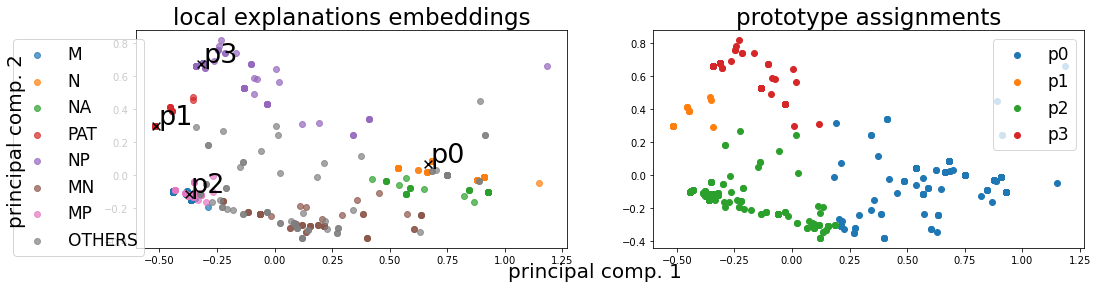

Alpha norms:
tensor([[0.7265, 0.5532, 1.0000, 0.6936],
        [1.0000, 0.3183, 0.4043, 0.3141]])
Concept Purity: 0.806015 +- 0.181411
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([245,  52, 394,  59], dtype=int64))
Logic formulas:
For class 0:
0.8773333333333333 (feature000) | ((feature001) | (feature003)
For class 1:
0.8773333333333333 (feature002)
Accuracy as classifier:  0.8773
LEN fidelity:  tensor(0.8773)


100: Loss: 0.04691, LEN: 0.046822, AccxC: 0.89, AccO: 0.89, V. Acc: 0.85, V. Loss: 0.05415, V. LEN 0.05
101: Loss: 0.04691, LEN: 0.046819, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05155, V. LEN 0.05
102: Loss: 0.04823, LEN: 0.048032, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05069, V. LEN 0.05
103: Loss: 0.04790, LEN: 0.047739, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05158, V. LEN 0.05
104: Loss: 0.04711, LEN: 0.046994, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05059, V. LEN 0.05
105: Loss: 0.04781, LEN: 0.047641, AccxC: 0.

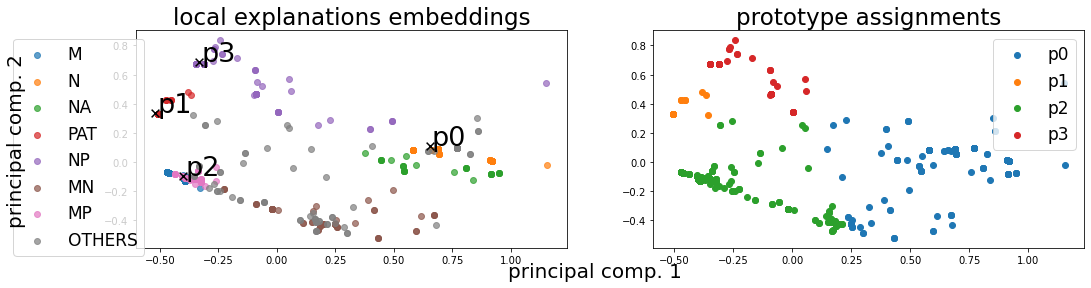

Alpha norms:
tensor([[0.6074, 0.5832, 1.0000, 0.7585],
        [1.0000, 0.4069, 0.4728, 0.4063]])
Concept Purity: 0.808858 +- 0.188110
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([249,  52, 392,  57], dtype=int64))
Logic formulas:
For class 0:
0.8773333333333333 (feature000) | ((feature001) | (feature003)
For class 1:
0.8773333333333333 (feature002)
Accuracy as classifier:  0.8773
LEN fidelity:  tensor(0.8773)


120: Loss: 0.04749, LEN: 0.047379, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05067, V. LEN 0.05
121: Loss: 0.04759, LEN: 0.047448, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05223, V. LEN 0.05
122: Loss: 0.04709, LEN: 0.046977, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05019, V. LEN 0.05
123: Loss: 0.04731, LEN: 0.047212, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04805, V. LEN 0.05
124: Loss: 0.04727, LEN: 0.047124, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05024, V. LEN 0.05
125: Loss: 0.04755, LEN: 0.047384, AccxC: 0.

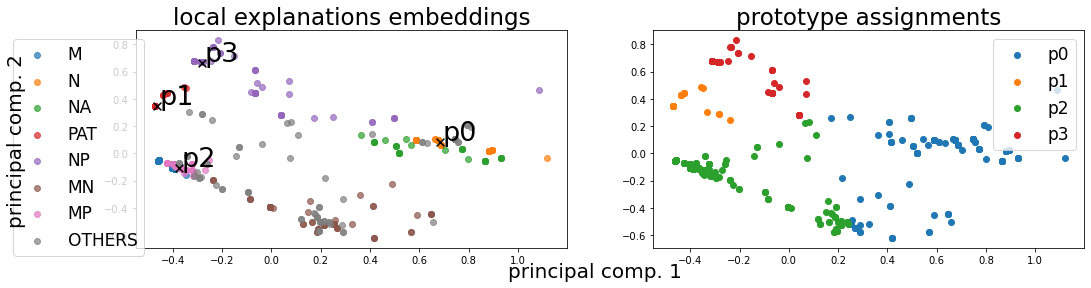

Alpha norms:
tensor([[0.5719, 0.5890, 1.0000, 0.8175],
        [1.0000, 0.4423, 0.4987, 0.4825]])
Concept Purity: 0.797319 +- 0.174208
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([245,  55, 393,  57], dtype=int64))
Logic formulas:
For class 0:
0.8786666666666667 (feature001) | ((feature000) | (feature003)
For class 1:
0.8786666666666667 (feature002)
Accuracy as classifier:  0.8787
LEN fidelity:  tensor(0.8787)


140: Loss: 0.04778, LEN: 0.047652, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05022, V. LEN 0.05
141: Loss: 0.04562, LEN: 0.045498, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05025, V. LEN 0.05
142: Loss: 0.04779, LEN: 0.047645, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05189, V. LEN 0.05
143: Loss: 0.04554, LEN: 0.045438, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05024, V. LEN 0.05
144: Loss: 0.04552, LEN: 0.045410, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04764, V. LEN 0.05
145: Loss: 0.04580, LEN: 0.045674, AccxC: 0.

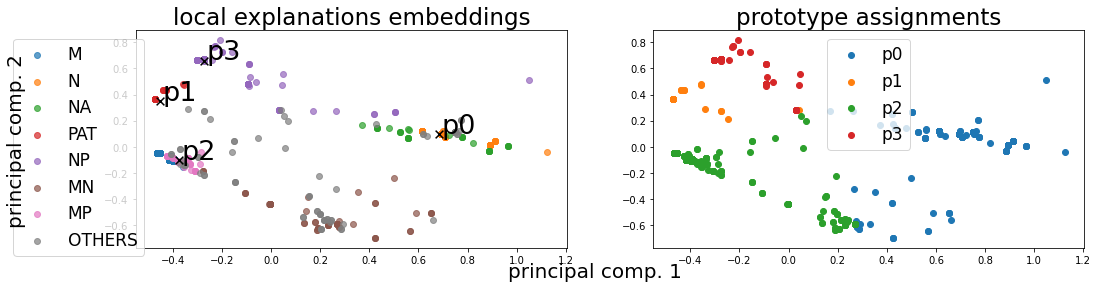

Alpha norms:
tensor([[0.5594, 0.5925, 1.0000, 0.8580],
        [1.0000, 0.4449, 0.5095, 0.5369]])
Concept Purity: 0.794928 +- 0.166991
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([237,  56, 400,  57], dtype=int64))
Logic formulas:
For class 0:
0.888 (feature001) | ((feature000) | (feature003)
For class 1:
0.888 (feature002)
Accuracy as classifier:  0.888
LEN fidelity:  tensor(0.8880)


160: Loss: 0.04671, LEN: 0.046589, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04768, V. LEN 0.05
161: Loss: 0.04688, LEN: 0.046763, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05023, V. LEN 0.05
162: Loss: 0.04724, LEN: 0.047105, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05027, V. LEN 0.05
163: Loss: 0.04762, LEN: 0.047424, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04777, V. LEN 0.05
164: Loss: 0.04700, LEN: 0.046779, AccxC: 0.88, AccO: 0.88, V. Acc: 0.85, V. Loss: 0.05471, V. LEN 0.05
165: Loss: 0.04618, LEN: 0.045319, AccxC: 0.88, AccO: 0.88, V. Acc: 0.8

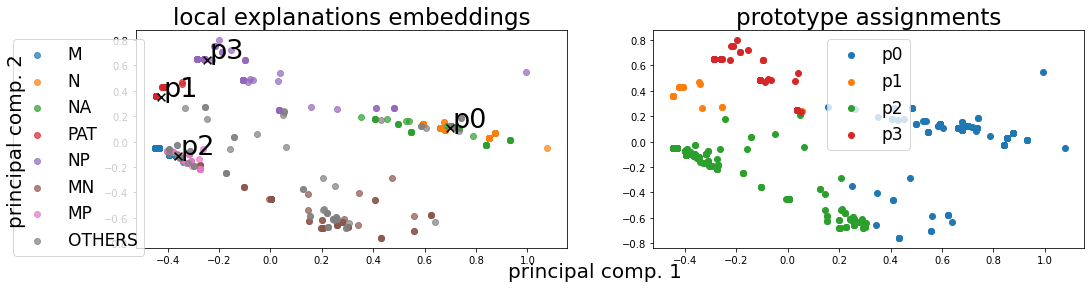

Alpha norms:
tensor([[0.5534, 0.5982, 1.0000, 0.8803],
        [1.0000, 0.4451, 0.5137, 0.5814]])
Concept Purity: 0.796285 +- 0.161653
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([230,  55, 407,  58], dtype=int64))
Logic formulas:
For class 0:
0.8866666666666667 (feature001) | ((feature000) | (feature003)
For class 1:
0.8866666666666667 (feature002)
Accuracy as classifier:  0.8867
LEN fidelity:  tensor(0.8867)


180: Loss: 0.04736, LEN: 0.047229, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05191, V. LEN 0.05
181: Loss: 0.04684, LEN: 0.046685, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05029, V. LEN 0.05
182: Loss: 0.04624, LEN: 0.045948, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05190, V. LEN 0.05
183: Loss: 0.04509, LEN: 0.044941, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04766, V. LEN 0.05
184: Loss: 0.04613, LEN: 0.045996, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04767, V. LEN 0.05
185: Loss: 0.04836, LEN: 0.048222, AccxC: 0.

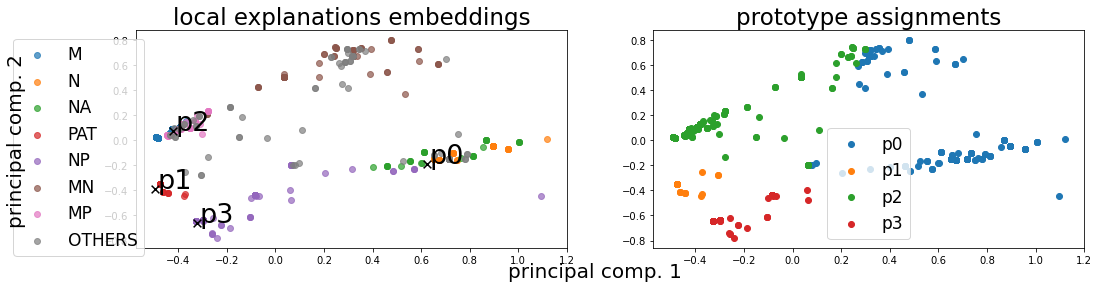

Alpha norms:
tensor([[0.5693, 0.6066, 1.0000, 0.9173],
        [1.0000, 0.4255, 0.4924, 0.6063]])
Concept Purity: 0.796848 +- 0.189317
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([265,  54, 380,  51], dtype=int64))
Logic formulas:
For class 0:
0.8746666666666667 (feature001) | ((feature000) | (feature003)
For class 1:
0.8746666666666667 (feature002)
Accuracy as classifier:  0.8747
LEN fidelity:  tensor(0.8747)


200: Loss: 0.04680, LEN: 0.046614, AccxC: 0.88, AccO: 0.88, V. Acc: 0.85, V. Loss: 0.05388, V. LEN 0.05
201: Loss: 0.04525, LEN: 0.045056, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05194, V. LEN 0.05
202: Loss: 0.04656, LEN: 0.046331, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04763, V. LEN 0.05
203: Loss: 0.04612, LEN: 0.045889, AccxC: 0.89, AccO: 0.89, V. Acc: 0.85, V. Loss: 0.05644, V. LEN 0.06
204: Loss: 0.04688, LEN: 0.046489, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04779, V. LEN 0.05
205: Loss: 0.04643, LEN: 0.046092, AccxC: 0.

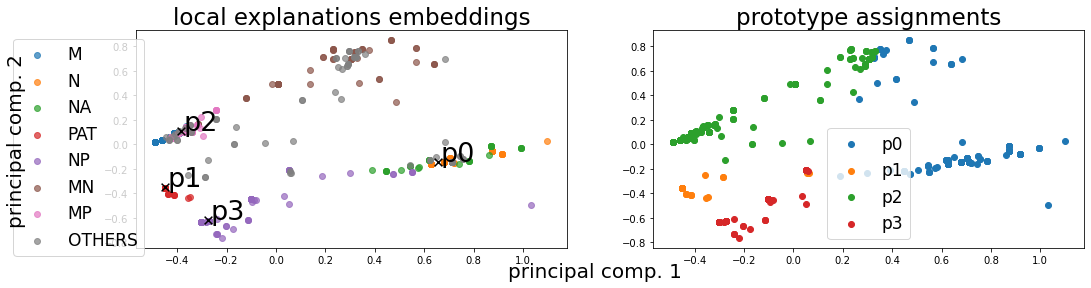

Alpha norms:
tensor([[0.5584, 0.5961, 1.0000, 0.9355],
        [1.0000, 0.4160, 0.5038, 0.6566]])
Concept Purity: 0.791045 +- 0.161499
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([237,  56, 399,  58], dtype=int64))
Logic formulas:
For class 0:
0.892 (feature001) | ((feature000) | (feature003)
For class 1:
0.892 (feature002)
Accuracy as classifier:  0.892
LEN fidelity:  tensor(0.8920)


220: Loss: 0.04728, LEN: 0.047139, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04758, V. LEN 0.05
221: Loss: 0.04566, LEN: 0.045520, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04758, V. LEN 0.05
222: Loss: 0.04448, LEN: 0.044352, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05110, V. LEN 0.05
223: Loss: 0.04408, LEN: 0.043932, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05127, V. LEN 0.05
224: Loss: 0.04411, LEN: 0.043927, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04759, V. LEN 0.05
225: Loss: 0.04602, LEN: 0.045886, AccxC: 0.89, AccO: 0.89, V. Acc: 0.8

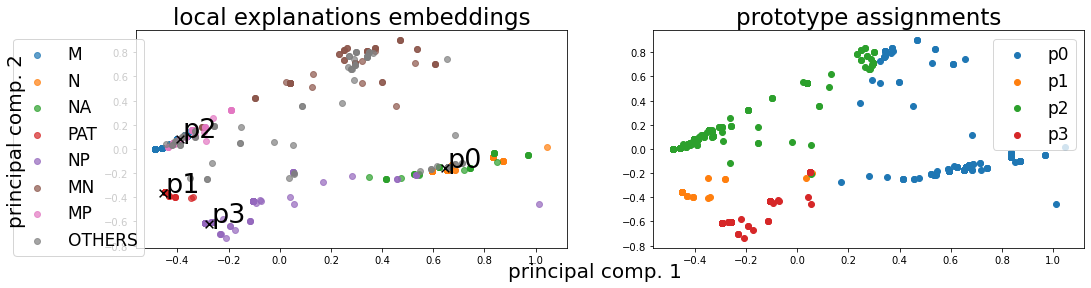

Alpha norms:
tensor([[0.5602, 0.6063, 1.0000, 0.9470],
        [1.0000, 0.4207, 0.5076, 0.6993]])
Concept Purity: 0.793249 +- 0.172545
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([248,  56, 389,  57], dtype=int64))
Logic formulas:
For class 0:
0.892 (feature001) | ((feature000) | (feature003)
For class 1:
0.892 (feature002)
Accuracy as classifier:  0.892
LEN fidelity:  tensor(0.8920)


240: Loss: 0.04474, LEN: 0.044603, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04683, V. LEN 0.05
241: Loss: 0.04694, LEN: 0.046783, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04769, V. LEN 0.05
242: Loss: 0.04440, LEN: 0.044240, AccxC: 0.89, AccO: 0.89, V. Acc: 0.85, V. Loss: 0.05553, V. LEN 0.06
243: Loss: 0.04518, LEN: 0.045034, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04762, V. LEN 0.05
244: Loss: 0.04378, LEN: 0.043635, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04761, V. LEN 0.05
245: Loss: 0.04536, LEN: 0.045220, AccxC: 0.89, AccO: 0.89, V. Acc: 0.8

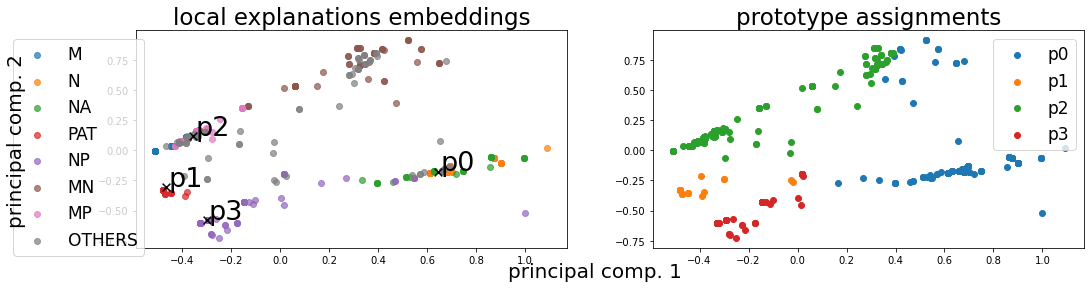

Alpha norms:
tensor([[0.5549, 0.5971, 1.0000, 0.9414],
        [1.0000, 0.4151, 0.5195, 0.7330]])
Concept Purity: 0.791865 +- 0.159534
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([233,  56, 403,  58], dtype=int64))
Logic formulas:
For class 0:
0.892 (feature001) | ((feature000) | (feature003)
For class 1:
0.892 (feature002)
Accuracy as classifier:  0.892
LEN fidelity:  tensor(0.8920)


260: Loss: 0.04343, LEN: 0.043280, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04763, V. LEN 0.05
261: Loss: 0.04572, LEN: 0.045544, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05132, V. LEN 0.05
262: Loss: 0.04627, LEN: 0.046049, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04761, V. LEN 0.05
263: Loss: 0.04633, LEN: 0.046137, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05126, V. LEN 0.05
264: Loss: 0.04453, LEN: 0.044346, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04675, V. LEN 0.05
265: Loss: 0.04560, LEN: 0.045403, AccxC: 0.89, AccO: 0.89, V. Acc: 0.8

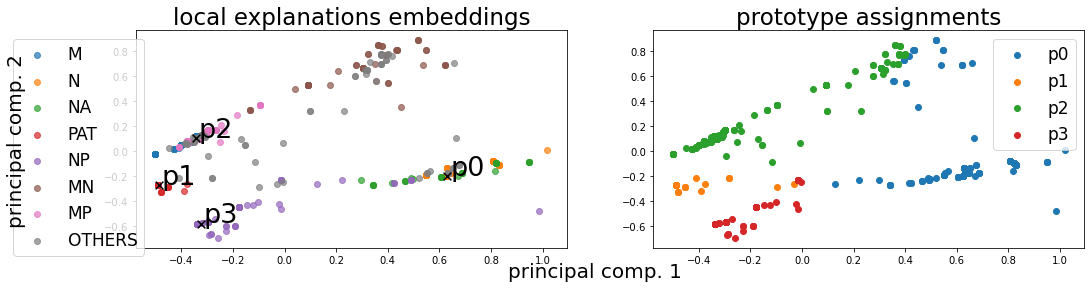

Alpha norms:
tensor([[0.5610, 0.5971, 1.0000, 0.9445],
        [1.0000, 0.4076, 0.5145, 0.7556]])
Concept Purity: 0.791239 +- 0.161001
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([236,  56, 400,  58], dtype=int64))
Logic formulas:
For class 0:
0.8933333333333333 (feature001) | ((feature000) | (feature003)
For class 1:
0.8933333333333333 (feature002)
Accuracy as classifier:  0.8933
LEN fidelity:  tensor(0.8933)


280: Loss: 0.04440, LEN: 0.044234, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04667, V. LEN 0.05
281: Loss: 0.04439, LEN: 0.044252, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04757, V. LEN 0.05
282: Loss: 0.04553, LEN: 0.045375, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04671, V. LEN 0.05
283: Loss: 0.04457, LEN: 0.044391, AccxC: 0.89, AccO: 0.89, V. Acc: 0.89, V. Loss: 0.04547, V. LEN 0.05
284: Loss: 0.04701, LEN: 0.046793, AccxC: 0.88, AccO: 0.88, V. Acc: 0.89, V. Loss: 0.04545, V. LEN 0.05
285: Loss: 0.04382, LEN: 0.043671, AccxC: 0.

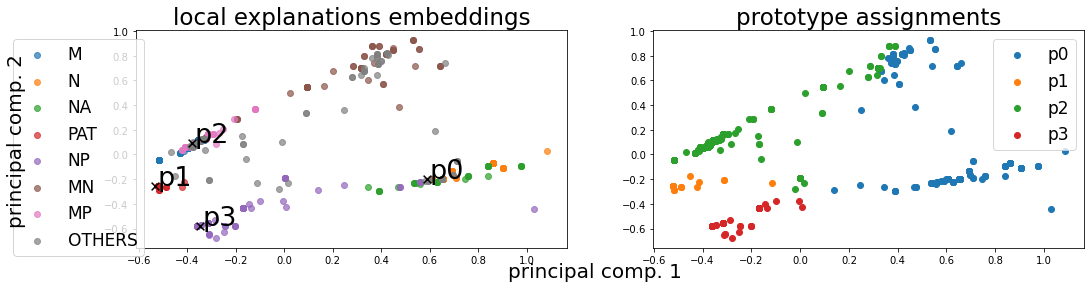

Alpha norms:
tensor([[0.5690, 0.5734, 1.0000, 0.9422],
        [1.0000, 0.3795, 0.5108, 0.7674]])
Concept Purity: 0.793389 +- 0.181744
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([257,  55, 387,  51], dtype=int64))
Logic formulas:
For class 0:
0.8813333333333333 (feature001) | ((feature000) | (feature003)
For class 1:
0.8813333333333333 (feature002)
Accuracy as classifier:  0.8813
LEN fidelity:  tensor(0.8813)


300: Loss: 0.05128, LEN: 0.051109, AccxC: 0.86, AccO: 0.86, V. Acc: 0.86, V. Loss: 0.05074, V. LEN 0.05
301: Loss: 0.04693, LEN: 0.046708, AccxC: 0.88, AccO: 0.88, V. Acc: 0.86, V. Loss: 0.05086, V. LEN 0.05
302: Loss: 0.04648, LEN: 0.046270, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04817, V. LEN 0.05
303: Loss: 0.04506, LEN: 0.044820, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04645, V. LEN 0.05
304: Loss: 0.04363, LEN: 0.043424, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04812, V. LEN 0.05
305: Loss: 0.04573, LEN: 0.045544, AccxC: 0.

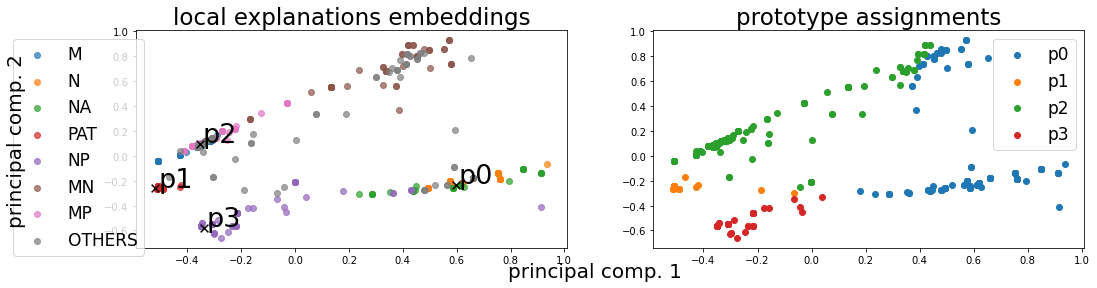

Alpha norms:
tensor([[0.5801, 0.5349, 1.0000, 0.9535],
        [1.0000, 0.3385, 0.5014, 0.7855]])
Concept Purity: 0.798714 +- 0.180114
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([247,  54, 397,  52], dtype=int64))
Logic formulas:
For class 0:
0.892 (feature000) | ((feature001) | (feature003)
For class 1:
0.892 (feature002)
Accuracy as classifier:  0.892
LEN fidelity:  tensor(0.8920)


320: Loss: 0.04540, LEN: 0.045225, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04799, V. LEN 0.05
321: Loss: 0.04506, LEN: 0.044878, AccxC: 0.88, AccO: 0.88, V. Acc: 0.89, V. Loss: 0.04528, V. LEN 0.05
322: Loss: 0.04377, LEN: 0.043612, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04716, V. LEN 0.05
323: Loss: 0.04504, LEN: 0.044871, AccxC: 0.89, AccO: 0.89, V. Acc: 0.89, V. Loss: 0.04530, V. LEN 0.05
324: Loss: 0.04588, LEN: 0.045720, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04792, V. LEN 0.05
325: Loss: 0.04409, LEN: 0.043909, AccxC: 0.89, AccO: 0.89, V. Acc: 0.8

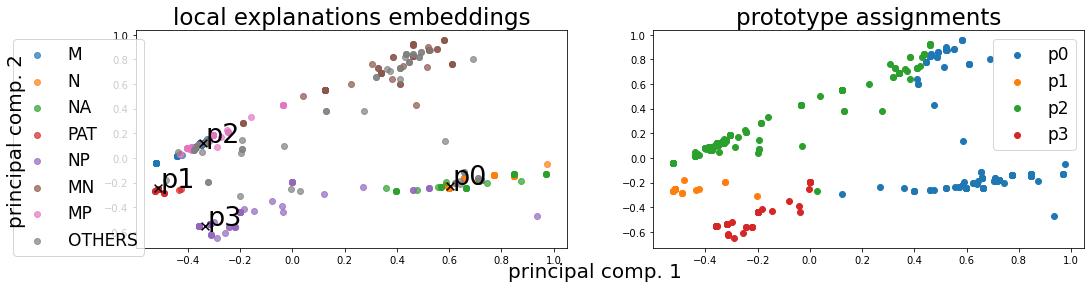

Alpha norms:
tensor([[0.5843, 0.5170, 1.0000, 0.9559],
        [1.0000, 0.3166, 0.5017, 0.8028]])
Concept Purity: 0.793196 +- 0.170074
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([247,  55, 390,  58], dtype=int64))
Logic formulas:
For class 0:
0.8906666666666667 (feature000) | ((feature001) | (feature003)
For class 1:
0.8906666666666667 (feature002)
Accuracy as classifier:  0.8907
LEN fidelity:  tensor(0.8907)


340: Loss: 0.04334, LEN: 0.043089, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04601, V. LEN 0.05
341: Loss: 0.04523, LEN: 0.045046, AccxC: 0.88, AccO: 0.88, V. Acc: 0.89, V. Loss: 0.04338, V. LEN 0.04
342: Loss: 0.04402, LEN: 0.043801, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05041, V. LEN 0.05
343: Loss: 0.04631, LEN: 0.046083, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04798, V. LEN 0.05
344: Loss: 0.04326, LEN: 0.043053, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04589, V. LEN 0.05
345: Loss: 0.04511, LEN: 0.044922, AccxC: 0.

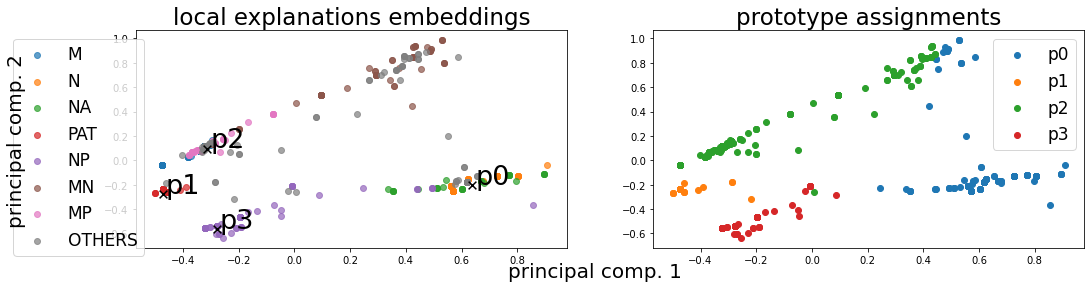

Alpha norms:
tensor([[0.5851, 0.4972, 1.0000, 0.9679],
        [1.0000, 0.2932, 0.4931, 0.8284]])
Concept Purity: 0.796532 +- 0.161884
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([231,  55, 405,  59], dtype=int64))
Logic formulas:
For class 0:
0.892 (feature000) | ((feature001) | (feature003)
For class 1:
0.892 (feature002)
Accuracy as classifier:  0.892
LEN fidelity:  tensor(0.8920)


360: Loss: 0.04395, LEN: 0.043714, AccxC: 0.89, AccO: 0.89, V. Acc: 0.89, V. Loss: 0.04315, V. LEN 0.04
361: Loss: 0.04392, LEN: 0.043688, AccxC: 0.89, AccO: 0.89, V. Acc: 0.82, V. Loss: 0.05424, V. LEN 0.05
362: Loss: 0.04568, LEN: 0.045494, AccxC: 0.88, AccO: 0.88, V. Acc: 0.89, V. Loss: 0.04309, V. LEN 0.04
363: Loss: 0.04466, LEN: 0.044478, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04558, V. LEN 0.05
364: Loss: 0.04438, LEN: 0.044219, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.05036, V. LEN 0.05
365: Loss: 0.04555, LEN: 0.045377, AccxC: 0.89, AccO: 0.89, V. Acc: 0.8

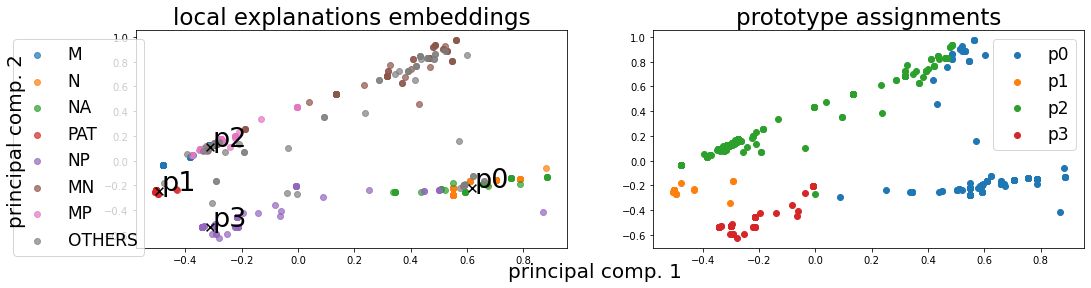

Alpha norms:
tensor([[0.5850, 0.4833, 1.0000, 0.9772],
        [1.0000, 0.2760, 0.4921, 0.8600]])
Concept Purity: 0.795156 +- 0.164010
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([235,  55, 402,  58], dtype=int64))
Logic formulas:
For class 0:
0.8933333333333333 (feature000) | ((feature001) | (feature003)
For class 1:
0.8933333333333333 (feature002)
Accuracy as classifier:  0.8933
LEN fidelity:  tensor(0.8933)


380: Loss: 0.04485, LEN: 0.044680, AccxC: 0.89, AccO: 0.89, V. Acc: 0.89, V. Loss: 0.04296, V. LEN 0.04
381: Loss: 0.04443, LEN: 0.044254, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04540, V. LEN 0.05
382: Loss: 0.04533, LEN: 0.045078, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04755, V. LEN 0.05
383: Loss: 0.04238, LEN: 0.042213, AccxC: 0.90, AccO: 0.90, V. Acc: 0.86, V. Loss: 0.04954, V. LEN 0.05
384: Loss: 0.04638, LEN: 0.046162, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04755, V. LEN 0.05
385: Loss: 0.04374, LEN: 0.043591, AccxC: 0.

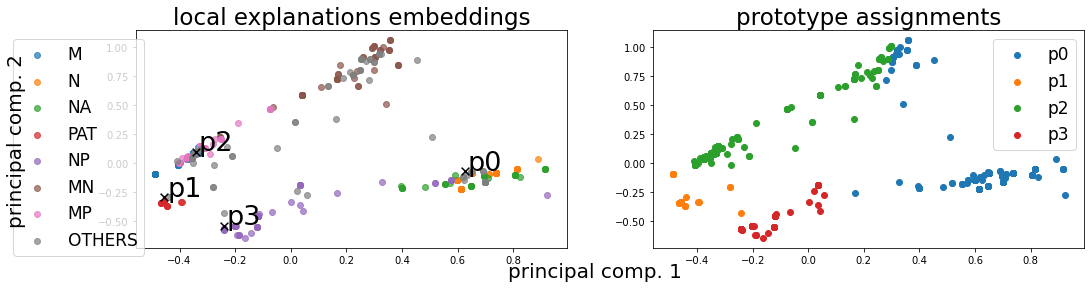

Alpha norms:
tensor([[0.5834, 0.4665, 1.0000, 0.9862],
        [1.0000, 0.2586, 0.4926, 0.8981]])
Concept Purity: 0.668423 +- 0.180651
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([240, 107, 344,  59], dtype=int64))
Logic formulas:
For class 0:
0.8426666666666667 (feature000) | ((feature001) | (feature003)
For class 1:
0.8426666666666667 (feature002)
Accuracy as classifier:  0.8427
LEN fidelity:  tensor(0.8427)


400: Loss: 0.04338, LEN: 0.043183, AccxC: 0.89, AccO: 0.89, V. Acc: 0.84, V. Loss: 0.05190, V. LEN 0.05
401: Loss: 0.04511, LEN: 0.044918, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04750, V. LEN 0.05
402: Loss: 0.04671, LEN: 0.046551, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04522, V. LEN 0.05
403: Loss: 0.04638, LEN: 0.046211, AccxC: 0.88, AccO: 0.88, V. Acc: 0.88, V. Loss: 0.04777, V. LEN 0.05
404: Loss: 0.04584, LEN: 0.045649, AccxC: 0.89, AccO: 0.89, V. Acc: 0.88, V. Loss: 0.04538, V. LEN 0.05
405: Loss: 0.04538, LEN: 0.045135, AccxC: 0.

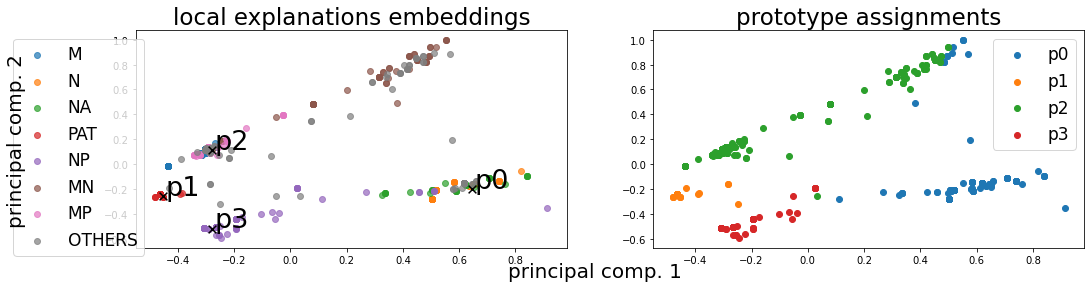

Alpha norms:
tensor([[0.5811, 0.4647, 0.9953, 1.0000],
        [1.0000, 0.2519, 0.4848, 0.9328]])
Concept Purity: 0.797055 +- 0.160295
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([227,  55, 410,  58], dtype=int64))
Logic formulas:
For class 0:
0.8933333333333333 (feature000) | ((feature001) | (feature003)
For class 1:
0.8933333333333333 (feature002)
Accuracy as classifier:  0.8933
LEN fidelity:  tensor(0.8933)


420: Loss: 0.04758, LEN: 0.047213, AccxC: 0.89, AccO: 0.89, V. Acc: 0.89, V. Loss: 0.04286, V. LEN 0.04
421: Loss: 0.04442, LEN: 0.044154, AccxC: 0.89, AccO: 0.89, V. Acc: 0.84, V. Loss: 0.05520, V. LEN 0.06
422: Loss: 0.04405, LEN: 0.043817, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.04981, V. LEN 0.05
423: Loss: 0.04634, LEN: 0.046146, AccxC: 0.89, AccO: 0.89, V. Acc: 0.85, V. Loss: 0.05250, V. LEN 0.05
424: Loss: 0.04433, LEN: 0.044134, AccxC: 0.89, AccO: 0.89, V. Acc: 0.86, V. Loss: 0.04970, V. LEN 0.05
425: Loss: 0.04295, LEN: 0.042721, AccxC: 0.

In [11]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)

torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"],
                                 backbone=hyper_params["embedder_backbone"],
                                 num_layers=hyper_params["embedder_num_layers"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model, 
                                   device, 
                                   hyper_params=hyper_params,
                                   classes_names=priori_etn_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)

expl.iterate(train_group_loader, val_group_loader, plot=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([273, 139,  32,  51,  65,  58,  42,  90], dtype=int64))
[0.62262535 0.34872332]


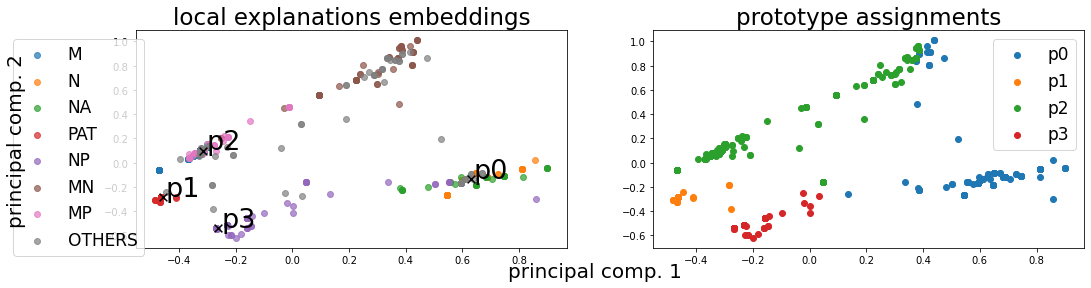

Alpha norms:
tensor([[0.5712, 0.4649, 0.9827, 1.0000],
        [1.0000, 0.2530, 0.4887, 0.9628]])
Concept Purity: 0.788876 +- 0.157937
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([231,  55, 411,  53], dtype=int64))
Logic formulas:
For class 0:
0.8946666666666667 (feature000) | ((feature001) | (feature003)
For class 1:
0.8946666666666667 (feature002)
Accuracy as classifier:  0.8947
LEN fidelity:  tensor(0.8947)



In [14]:
expl.inspect(train_group_loader)

### inspect local explanations

In [16]:
x_train , emb , concepts_assignement , y_train_1h , le_classes , le_idxs , belonging = expl.get_concept_vector(train_group_loader, 
                                                                                                               return_raw=True)        

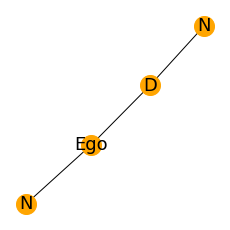

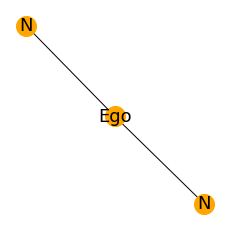

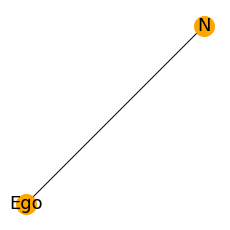

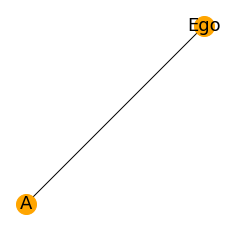

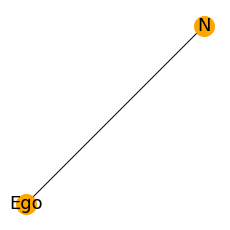

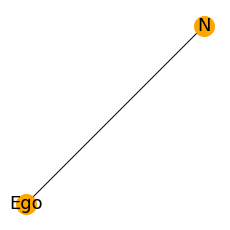

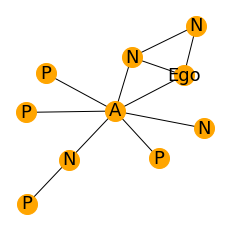

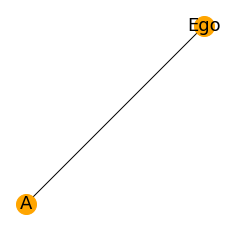

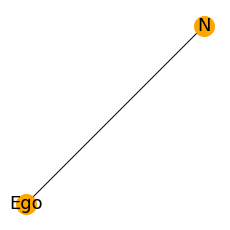

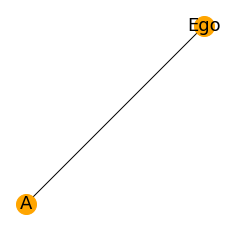

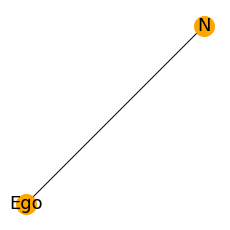

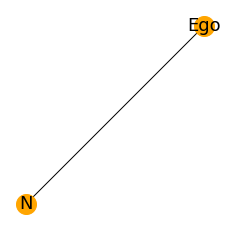

In [18]:
idxs = le_idxs[concepts_assignement.argmax(-1) == 0]
for idx in idxs[:12]: 
    plt.figure(figsize=(3,3))
    utils.plot_etn(dataset_train[int(idx)])
    plt.show()

In [ ]:
idxs = le_idxs[concepts_assignement.argmax(-1) == 1]
for idx in idxs[:12]: 
    plt.figure(figsize=(3,3))
    plot_etn(dataset_train[int(idx)])
    plt.show()

## Load Trained Model

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([273, 139,  32,  51,  65,  58,  42,  90], dtype=int64))
[0.7701706  0.18829939]


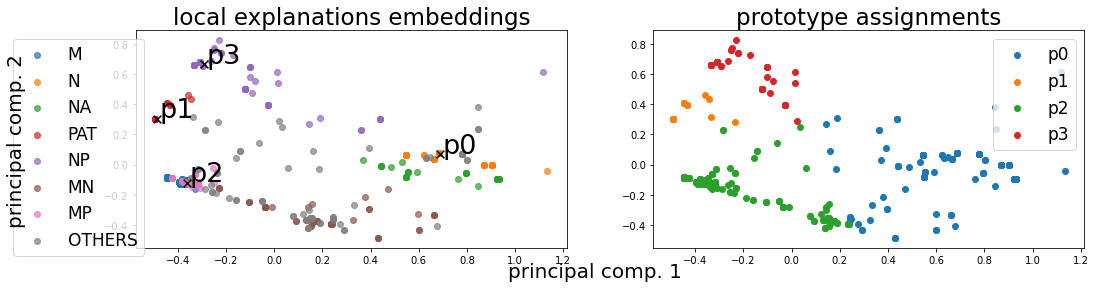

Alpha norms:
tensor([[0.6428, 0.5790, 1.0000, 0.7306],
        [1.0000, 0.3748, 0.4458, 0.3668]])
Concept Purity: 0.801765 +- 0.175530
Concept distribution:  (array([0, 1, 2, 3], dtype=int64), array([242,  53, 397,  58], dtype=int64))
Logic formulas:
For class 0:
0.8866666666666667 (feature000) | ((feature001) | (feature003)
For class 1:
0.8866666666666667 (feature002)
Accuracy as classifier:  0.8867
LEN fidelity:  tensor(0.8867)



In [14]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)

torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"],
                                 backbone=hyper_params["embedder_backbone"],
                                 num_layers=hyper_params["embedder_num_layers"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model, 
                                   device, 
                                   hyper_params=hyper_params,
                                   classes_names=priori_etn_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)
expl.load_state_dict(torch.load("../trained_models/HIN.pt"))
expl.eval()
expl.inspect(train_group_loader)

### materialize prototypes

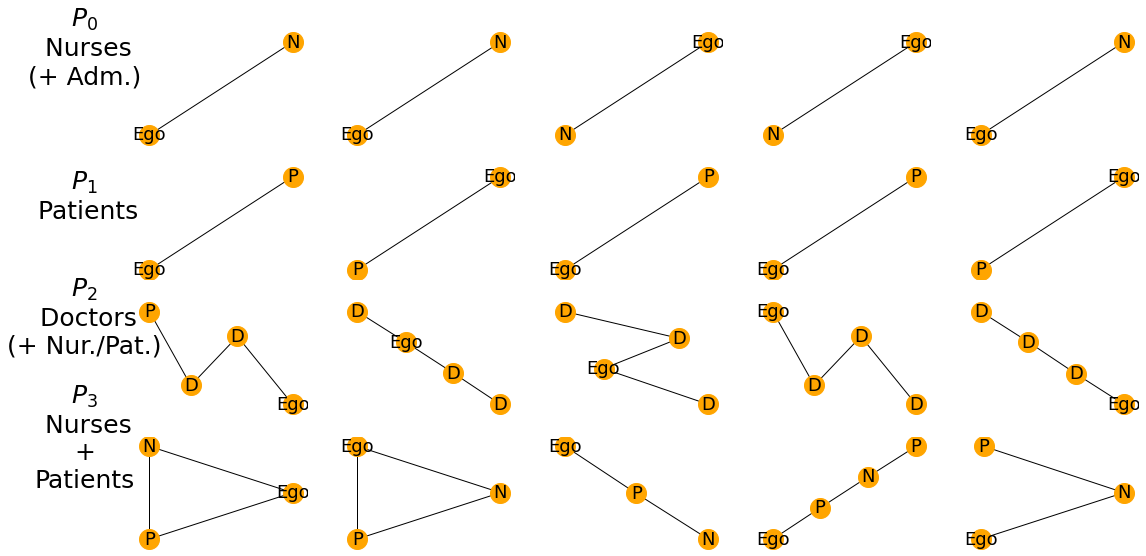

In [12]:
# change assign function to a non-discrete one just to compute distance between local expls. and prototypes
# useful to show the materialization of prototypes based on distance 
best_expl.hyper["assign_func"] = "sim"

x_train , emb , concepts_assignement , y_train_1h , le_classes , le_idxs , belonging = expl.get_concept_vector(test_group_loader, 
                                                                                                                    return_raw=True)        
best_expl.hyper["assign_func"] = "discrete"

proto_names = {
    0: "Nurses\n(+ Adm.)",
    1: "Patients",
    2: "Doctors\n(+ Nur./Pat.)",
    3: "Nurses\n+\nPatients",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(18,5*1.9))
n = 0
for p in range(expl.hyper["num_prototypes"]):
    idxs = le_idxs[concepts_assignement.argmax(-1) == p]
    #idxs = idxs[torch.randperm(len(idxs))]    
    sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
    idxs = idxs[torch.argsort(sa[:, p], descending=True)]
    
    for ex in range(5):
        n += 1
        ax = plt.subplot(expl.hyper["num_prototypes"],5,n)      
        #G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True)
        #pos = nx.spring_layout(G, seed=42)
        #nx.draw(G, pos, node_size=300, ax=ax, node_color="orange")
        utils.plot_etn(dataset_test[int(idxs[ex])])
        ax.axis("on")
        plt.box(False)
        
for p in range(expl.hyper["num_prototypes"]):
    plt.subplot(expl.hyper["num_prototypes"],5,5*p + 1)
    plt.ylabel(f"$P_{p}$\n {proto_names[p]}", size=25, rotation="horizontal", labelpad=50)

plt.savefig("prototypes_etn.pdf")
plt.show() 